# ETS Decomposition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Additive Model

$y_t = Level + Trend + Seasonality + Noise$

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#dtype = {'region': str, 'sales_representative': np.int64, 'sales_amount': float}

In [22]:
df=pd.read_csv('Data_set_3.csv', index_col='time', parse_dates=True, dtype={'demand':float})

df.drop(['년','월','일','시간','요일','기온(°C)','풍속(m/s)','하차'], axis=1, inplace=True)

#df['Value']

df_day=df.resample(rule='D').sum()

#df_day

df_day.drop(df_day.index[348], inplace=True)

series_day = df_day['demand']

In [36]:
series_day.describe()

count     365.000000
mean      285.991781
std       247.458938
min         2.000000
25%        92.000000
50%       223.000000
75%       421.000000
max      1277.000000
Name: demand, dtype: float64

In [30]:
series_day.head()

time
2020-01-01    32.0
2020-01-02    74.0
2020-01-03    68.0
2020-01-04    62.0
2020-01-05    68.0
Name: demand, dtype: float64

In [41]:
series_day

time
2020-01-01     32.0
2020-01-02     74.0
2020-01-03     68.0
2020-01-04     62.0
2020-01-05     68.0
              ...  
2020-12-27    147.0
2020-12-28    154.0
2020-12-29     80.0
2020-12-30     31.0
2020-12-31     39.0
Name: demand, Length: 365, dtype: float64

In [40]:
result_add = seasonal_decompose(series_day, model='additive',freq='D')

TypeError: ignored

In [28]:
def plot_decompose(decomposeresult):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
    decomposeresult.observed.plot(legend=False, ax=ax1)
    ax1.set_ylabel('Observerd')
    decomposeresult.trend.plot(legend=False, ax=ax2)
    ax2.set_ylabel('Trend')
    decomposeresult.seasonal.plot(legend=False, ax=ax3)
    ax3.set_ylabel('Seasonal')
    decomposeresult.resid.plot(legend=False, ax=ax4)
    ax4.set_ylabel('Resid')

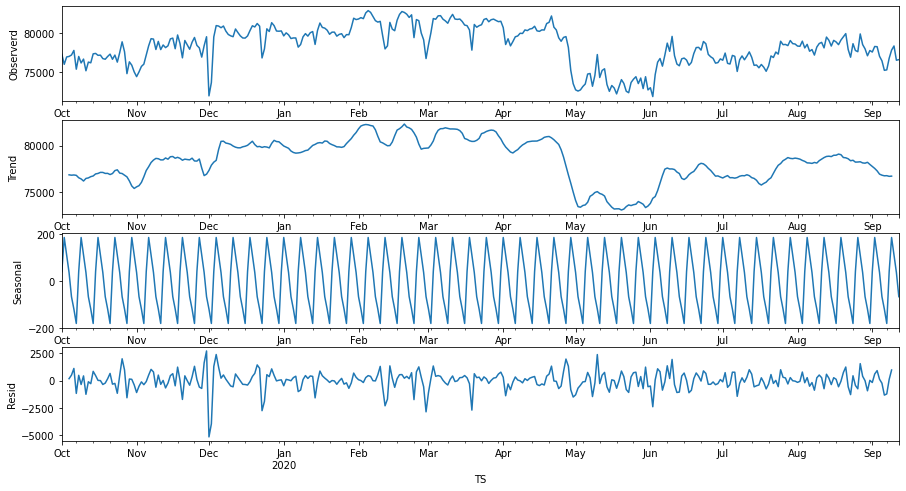

In [29]:
plot_decompose(result_add)

### Multiplicative Model

$y_t = Level \times Trend \times Seasonality \times Noise$

In [34]:
result_mul = seasonal_decompose(series_day, model='multiplicative')
plot_decompose(result_mul)

ValueError: ignored

## ETS

linear trend 를 가지고 있고 seasonality 와 trend 컴포넌트가 시간흐름에 따라 고정적일 때 (ex 매년 승객 1만명 증가) additive model 을 사용합니다. non-linear 하게 증가하거나 감소하는 trend 를 보일 경우 (ex 매년 승객 수 두 배 증가) multiplicative model 이 더 적합합니다.

챠트를 보면 초기에 비해 후기로 갈 수록 꾸준히 증가하는 비율로 비선형 증가 추세를 보이고 있습니다.

In [ ]:
df=pd.read_excel('Total_final.xls', index_col='TS', parse_dates=True, dtype={'Value':float})

In [ ]:
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)

In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35136 entries, 2019-03-01 00:15:00 to 2020-03-01 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   35136 non-null  float64
dtypes: float64(1)
memory usage: 549.0 KB


In [ ]:
#df.drop(['Dates'], axis=1, inplace=True)
df.drop(df.index[366], inplace=True)

In [ ]:
df=df.resample(rule='D').sum()

In [ ]:
df.head()

,Value
TS,
2019-03-01,15824.40
2019-03-02,15608.88
2019-03-03,15234.96
2019-03-04,15549.12
2019-03-05,15568.32


In [ ]:
result = seasonal_decompose(df['Value'], model='multiplicative', freq=7)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


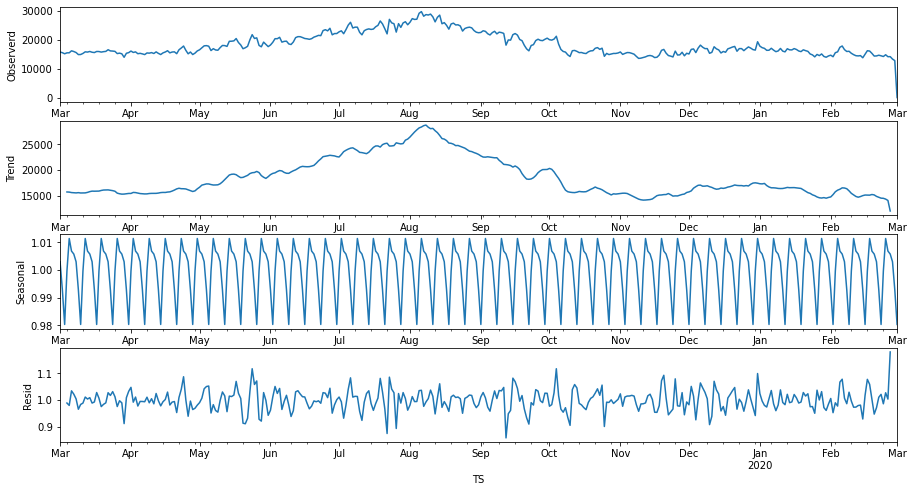

In [ ]:
plot_decompose(result)